In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

<ipython-input-1-602b26630176>:27: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/Human Activity Recognition by smartphones/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Human Activity Recognition by smartphones/test.csv")

In [3]:
train_data.shape

(7352, 563)

In [4]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [5]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [6]:
#data cleaning
train_data.duplicated().sum()

0

In [7]:
train_data.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

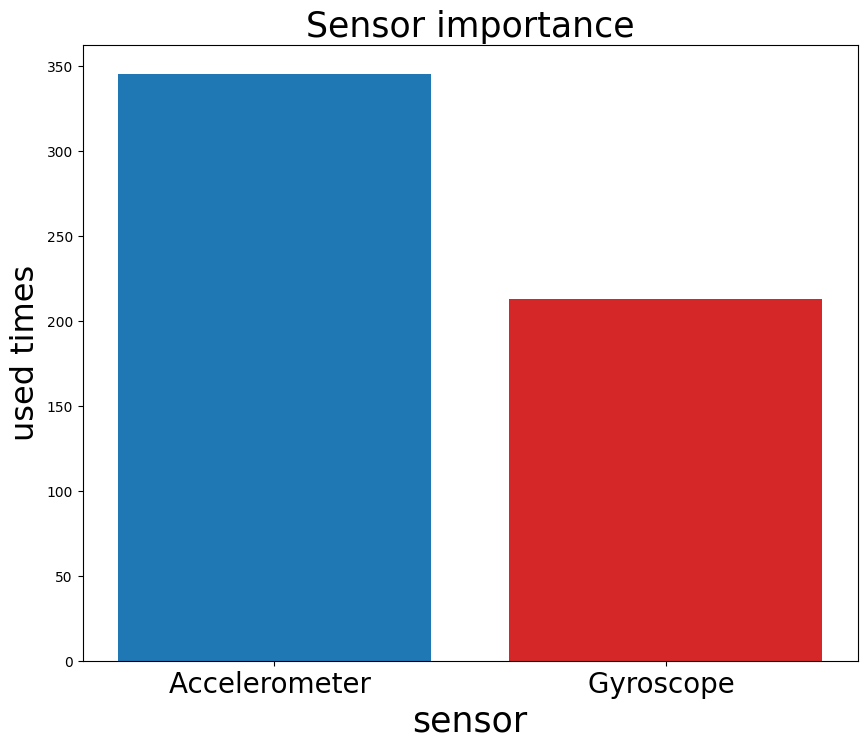

In [8]:
#EDA
Acc=0
Gyro=0
other=0
for i in train_data.columns:
    if'Acc'in i:
        Acc += 1
    elif'Gyro'in i:
        Gyro += 1
    else:
        other += 1

plt.figure(figsize=(10, 8))
plt.bar(x = ['Accelerometer ','Gyroscope '], height = [Acc,Gyro], color=['tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("sensor", size=25)
plt.ylabel("used times", size=23)
plt.xticks(fontsize=20)
plt.show()

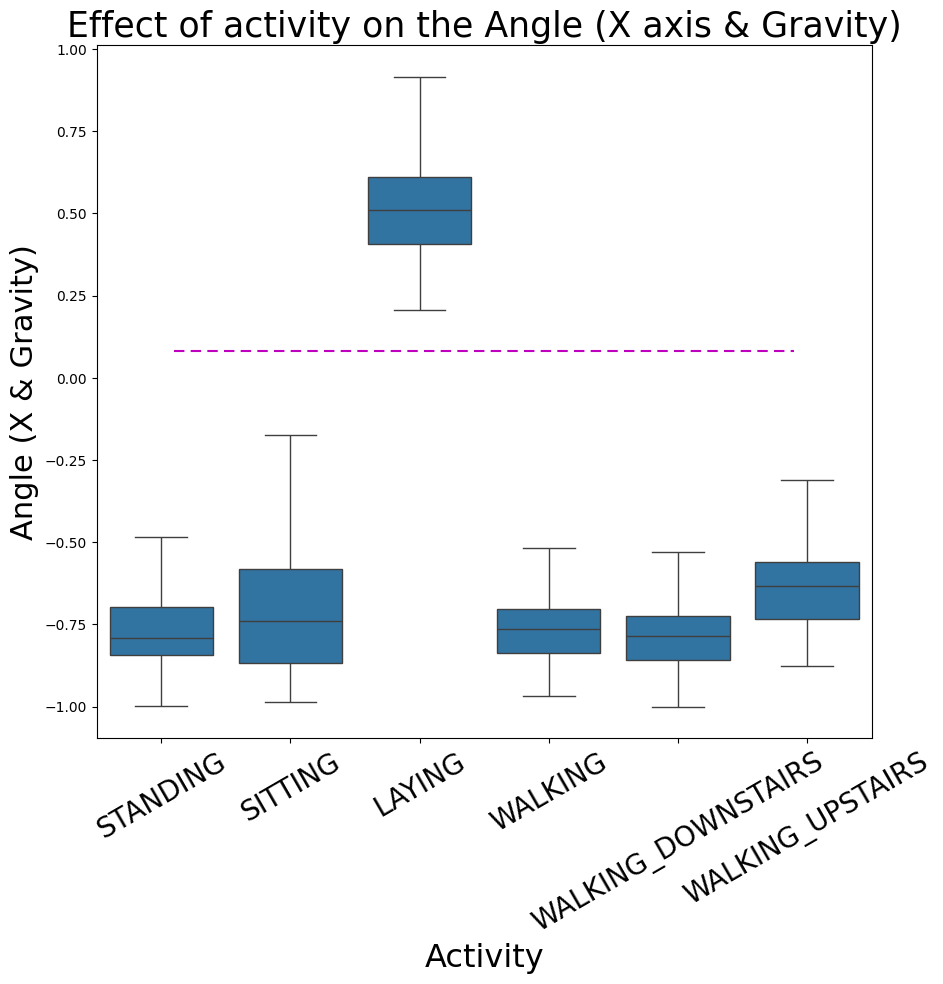

In [9]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=23)
plt.ylabel('Angle (X & Gravity)', size=22)
plt.xticks(rotation=30,fontsize=20)
plt.show()

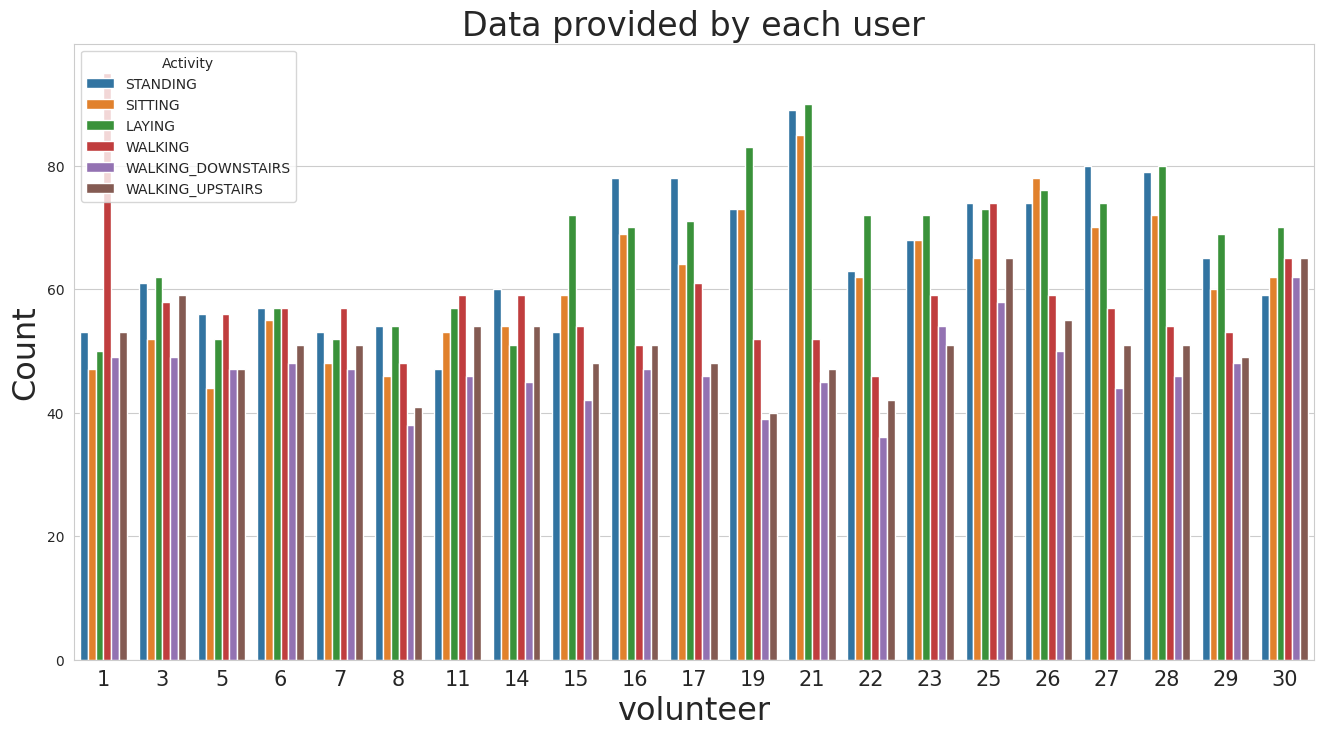

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.color_palette("tab10")
plt.title('Data provided by each user', fontsize=24)
sns.countplot(x='subject',hue='Activity',data=train_data)
plt.xlabel("volunteer", size=23)
plt.ylabel("Count", size=23)
plt.xticks(size=15)
plt.show()

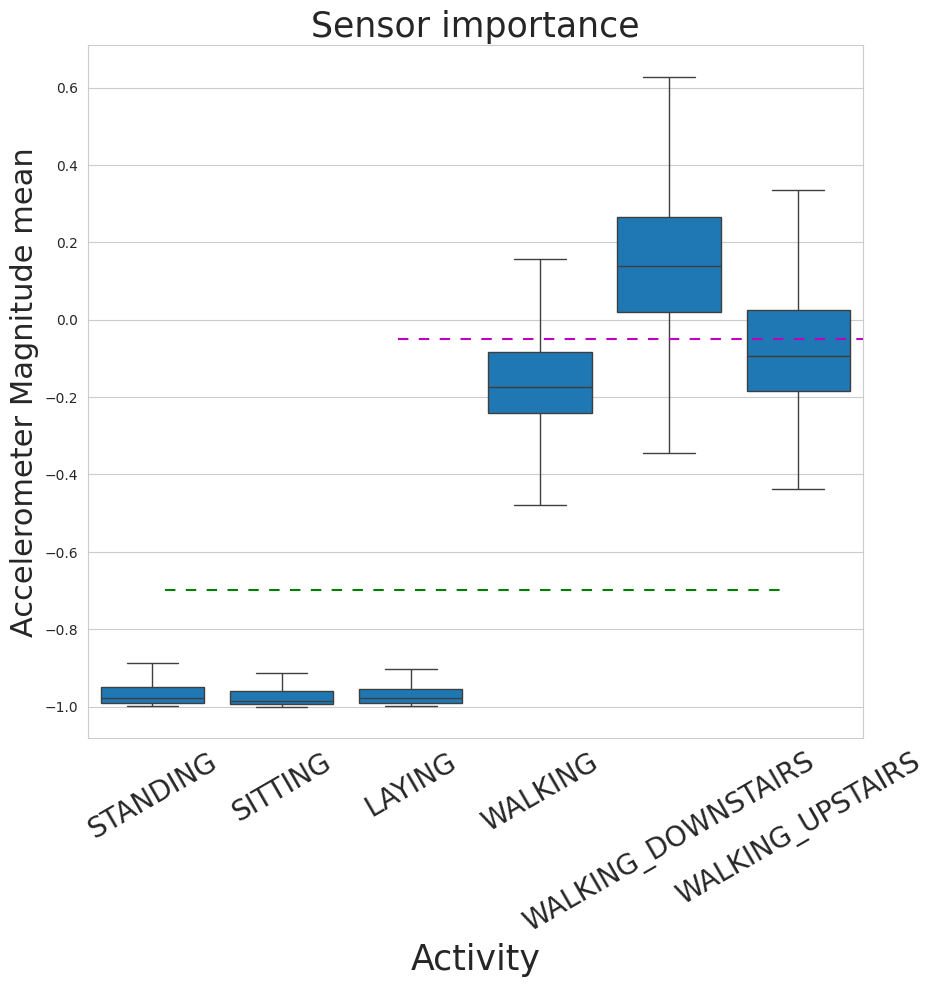

In [11]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Activity", size=25)
plt.ylabel('Accelerometer Magnitude mean', size=22)
plt.xticks(rotation=30, fontsize=20)
plt.show()

In [12]:
columns = train_data.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_data.columns = columns
test_data.columns = columns

In [13]:
#Reducing dimensions by T SNE
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, \
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.044s...
[t-SNE] Computed neighbors for 7352 samples in 3.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.344s
[t-SNE] Iteration 50: error = 89.2955399, gradient norm = 0.0308251 (50 iterations in 9.729s)
[t-SNE] Iteration 100: error = 82.9649963, gradient norm = 0.0081409 (50 iterations in 3.035s)
[t-SNE] Iteration 150: error = 81.5950851, gradient norm = 0

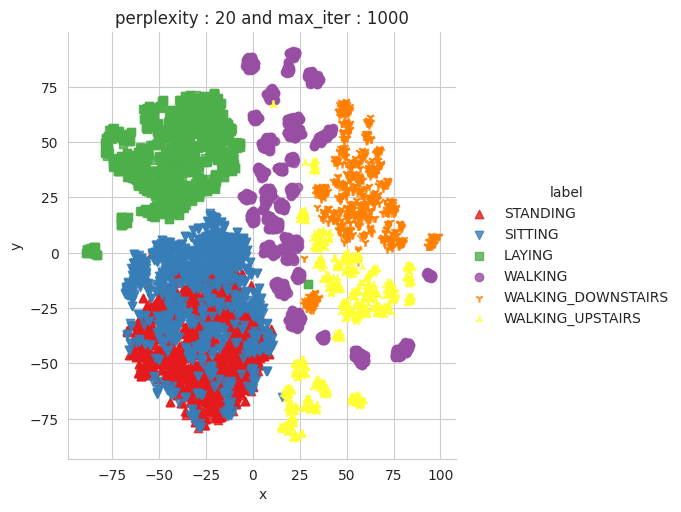

Done


In [14]:
X_pre_tsne=train_data.drop(['subject','Activity'],axis=1)
y_pre_tsne=train_data['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20])

In [15]:
#PCA
data=pd.concat([train_data,test_data])
data=train_data.sample(frac=1)
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']

X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']

pca=PCA(n_components=0.99)
pca.fit(X)
x_reduced=pca.transform(X)


print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=8598)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=8598)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=8598)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=8598)

Frequency components number is 296 Time components number is 265
Original number of features 561 Reduced number of features 155


In [16]:
#modeling
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')

    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [17]:
x_train, y_train = train_data.iloc[:, :-2], train_data.iloc[:, -1:]
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [18]:
x_test, y_test = test_data.iloc[:, :-2], test_data.iloc[:, -1:]
x_test.shape, y_test.shape

((2947, 561), (2947, 1))

In [19]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [20]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                35968     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 36358 (142.02 KB)
Trainable params: 36358 (142.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs= 10,validation_data = (x_test,y_test))

Epoch 1/10
115/115 [==============================] - 3s 10ms/step - loss: 1.1959 - accuracy: 0.5955 - val_loss: 0.8497 - val_accuracy: 0.8049
Epoch 2/10
115/115 [==============================] - 1s 5ms/step - loss: 0.6441 - accuracy: 0.8251 - val_loss: 0.5113 - val_accuracy: 0.8772
Epoch 3/10
115/115 [==============================] - 1s 5ms/step - loss: 0.4107 - accuracy: 0.8825 - val_loss: 0.3568 - val_accuracy: 0.9155
Epoch 4/10
115/115 [==============================] - 1s 5ms/step - loss: 0.3003 - accuracy: 0.9138 - val_loss: 0.2793 - val_accuracy: 0.9253
Epoch 5/10
115/115 [==============================] - 1s 5ms/step - loss: 0.2373 - accuracy: 0.9289 - val_loss: 0.2388 - val_accuracy: 0.9247
Epoch 6/10
115/115 [==============================] - 0s 4ms/step - loss: 0.2008 - accuracy: 0.9399 - val_loss: 0.2188 - val_accuracy: 0.9196
Epoch 7/10
115/115 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 0.9493 - val_loss: 0.1812 - val_accuracy: 0.9454
Epoch

In [22]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 25)):
        model.add(layers.Dense(units = hp.Int('units' + str(i), min_value=32, max_value=512, step=32),
                               kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']),
                               activation= hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
    model.add(layers.Dense(6, kernel_initializer= hp.Choice('initializer', ['uniform', 'normal']), activation='softmax'))
    model.add(
            Dropout(0.2))
    model.compile(
        optimizer = 'adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Human_activity_recognition')

tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 25, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
initializer (Choice)
{'default': 'uniform', 'conditions': [], 'values': ['uniform', 'normal'], 'ordered': False}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [26]:
tuner.search(x_train, y_train,
             epochs= 10,
             validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 07s]
val_accuracy: 0.9452550609906515

Best val_accuracy So Far: 0.9452550609906515
Total elapsed time: 00h 12m 13s


In [25]:
tuner.results_summary()

Results summary
Results in project/Human_activity_recognition
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 7
units0: 96
initializer: uniform
activation: relu
units1: 480
units2: 480
units3: 480
units4: 96
units5: 64
units6: 128
units7: 448
units8: 192
units9: 192
units10: 96
units11: 480
units12: 96
units13: 480
units14: 160
units15: 64
units16: 256
units17: 352
units18: 512
units19: 256
units20: 224
units21: 224
Score: 0.7749123374621073

Trial 0 summary
Hyperparameters:
num_layers: 22
units0: 192
initializer: uniform
activation: relu
units1: 384
units2: 32
units3: 32
units4: 32
units5: 32
units6: 32
units7: 32
units8: 32
units9: 32
units10: 32
units11: 32
units12: 32
units13: 32
units14: 32
units15: 32
units16: 32
units17: 32
units18: 32
units19: 32
units20: 32
units21: 32
Score: 0.18221920728683472

Trial 2 summary
Hyperparameters:
num_layers: 23
units0: 512
initializer: uniform
activation: tanh
units1: 288
unit

In [27]:
model=tuner.get_best_models(num_models=1)[0]
history = model.fit(x_train,y_train, epochs=51, validation_data=(x_test,y_test))

Epoch 1/51
230/230 [==============================] - 4s 11ms/step - loss: 1.2381 - accuracy: 0.7739 - val_loss: 0.2966 - val_accuracy: 0.9345
Epoch 2/51
230/230 [==============================] - 2s 9ms/step - loss: 1.0822 - accuracy: 0.7824 - val_loss: 0.5574 - val_accuracy: 0.9002
Epoch 3/51
230/230 [==============================] - 2s 8ms/step - loss: 1.0131 - accuracy: 0.7784 - val_loss: 0.3690 - val_accuracy: 0.9338
Epoch 4/51
230/230 [==============================] - 1s 6ms/step - loss: 0.8548 - accuracy: 0.7858 - val_loss: 0.3508 - val_accuracy: 0.9508
Epoch 5/51
230/230 [==============================] - 1s 5ms/step - loss: 0.8803 - accuracy: 0.7764 - val_loss: 0.4310 - val_accuracy: 0.9427
Epoch 6/51
230/230 [==============================] - 1s 5ms/step - loss: 0.7807 - accuracy: 0.7786 - val_loss: 0.3878 - val_accuracy: 0.9518
Epoch 7/51
230/230 [==============================] - 1s 6ms/step - loss: 0.7109 - accuracy: 0.7941 - val_loss: 0.9040 - val_accuracy: 0.8931
Epoch

In [28]:
model.summary()
import tensorflow as tf

from tensorflow import keras

Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fitt = model.fit(x_train,y_train, epochs=200, validation_data=(x_test,y_test), callbacks=Callback)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 480)               269760    
                                                                 
 dense_1 (Dense)             (None, 32)                15392     
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
Total params: 285350 (1.09 MB)
Trainable params: 285350 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
230/230 [==============================] - 2s 7ms/step - loss: 0.4991 - accuracy: 0.7930 - val_loss: 0.7127 - val_accuracy: 0.9365
Epoch 2/2

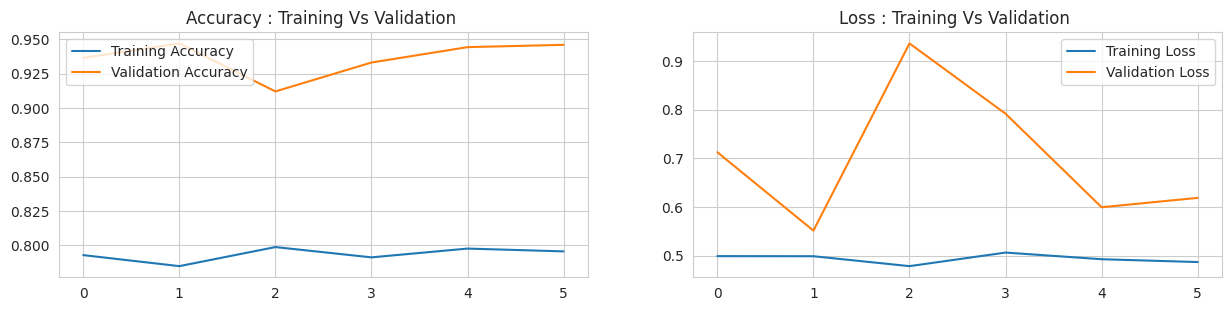

In [29]:
accuracy = mo_fitt.history['accuracy']
loss = mo_fitt.history['loss']
validation_loss = mo_fitt.history['val_loss']
validation_accuracy = mo_fitt.history['val_accuracy']


plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

Training Accuracy Logistic Regression 99.07508161044613  Test Accuracy Logistic Regression 95.82626399728538
Training Precesion Logistic Regression 99.07508161044613  Test Precesion Logistic Regression 95.82626399728538
Training Recall Logistic Regression 99.07508161044613  Test Recall Logistic Regression 95.82626399728538


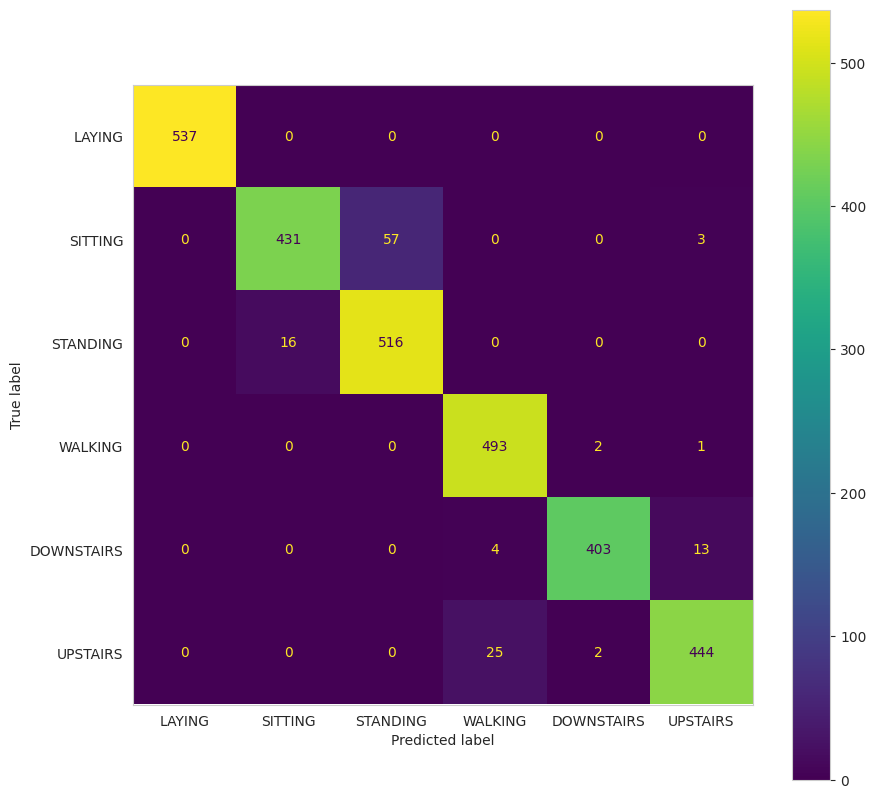

In [30]:
#logistic regression
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

In [31]:
#KNN
SC=StandardScaler()
X_train_Scaled=SC.fit_transform(x_train)
X_test_Scaled=SC.fit_transform(x_test)

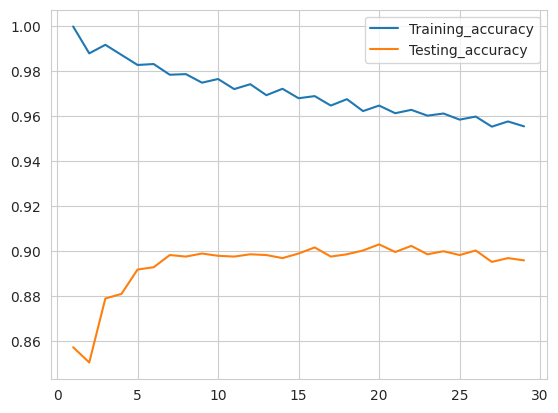

In [32]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracy=[]
test_accuracy=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_Scaled,y_train)
  train_accuracy.append(knn.score(X_train_Scaled,y_train))
  test_accuracy.append(knn.score(X_test_Scaled,y_test))

x=[i for i in range(1,30)]
plt.plot(x,train_accuracy,label='Training_accuracy')
plt.plot(x,test_accuracy,label='Testing_accuracy')
plt.legend()
plt.plot();

In [33]:
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_Scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
classifier.score(X_train_Scaled,y_train)
classifier.score(X_test_Scaled,y_test)

0.8788598574821853

Training Accuracy KNeighborsClassifier 95.94668117519043  Test Accuracy KNeighborsClassifier 90.02375296912113
Training Precesion KNeighborsClassifier 95.94668117519043  Test Precesion KNeighborsClassifier 90.02375296912113
Training Recall KNeighborsClassifier 95.94668117519043  Test Recall KNeighborsClassifier 90.02375296912113


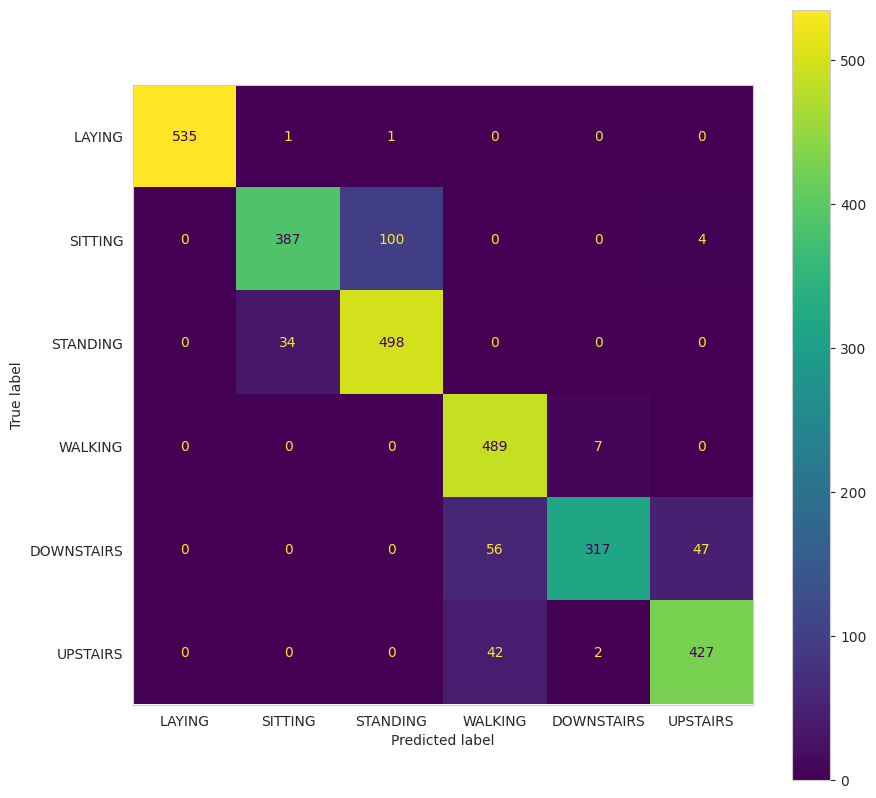

In [35]:
knn = KNeighborsClassifier(n_neighbors=30).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Training Accuracy Linear SVC(LBasedImpl) 99.48313384113166  Test Accuracy Linear SVC(LBasedImpl) 96.53885307091959
Training Precesion Linear SVC(LBasedImpl) 99.48313384113166  Test Precesion Linear SVC(LBasedImpl) 96.53885307091959
Training Recall Linear SVC(LBasedImpl) 99.48313384113166  Test Recall Linear SVC(LBasedImpl) 96.53885307091959


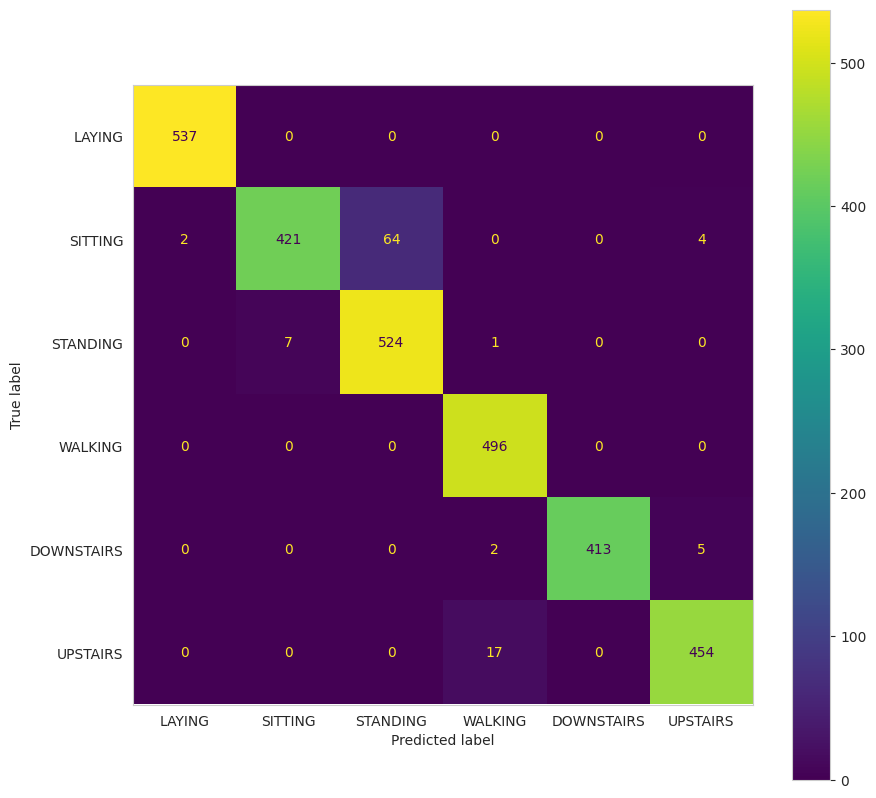

In [36]:
#Support vector Machine SVMs
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

Training Accuracy RBF SVC 97.90533188248097  Test Accuracy RBF SVC 95.04580929759076
Training Precesion RBF SVC 97.90533188248097  Test Precesion RBF SVC 95.04580929759076
Training Recall RBF SVC 97.90533188248097  Test Recall RBF SVC 95.04580929759076


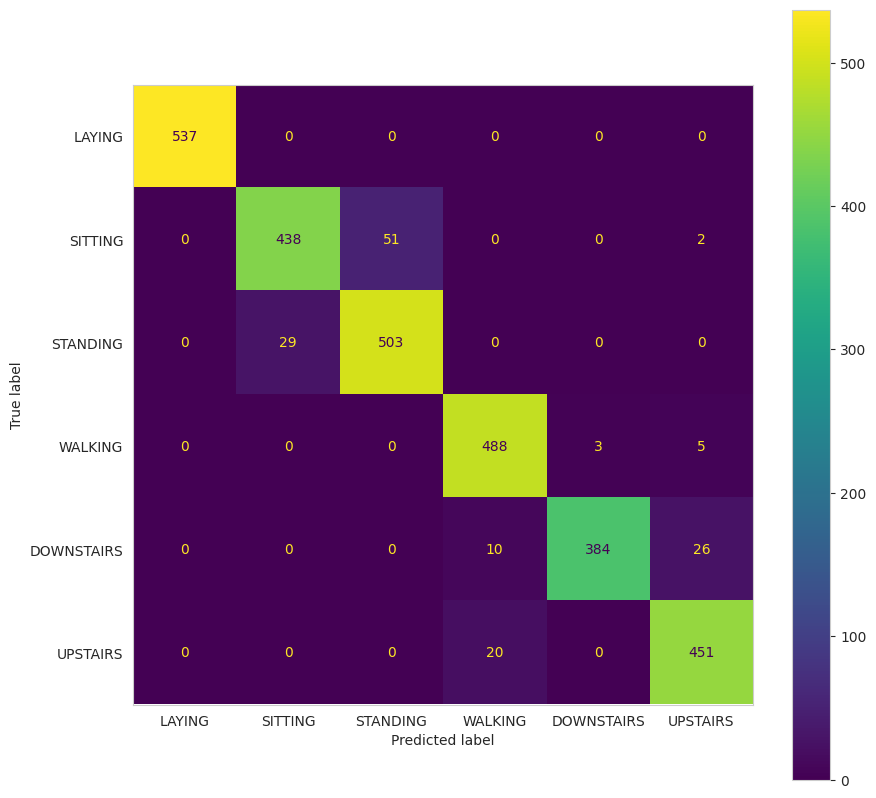

In [37]:
rbf = svm.SVC(kernel='rbf').fit(x_train, y_train)
evaluate_classification(rbf, "RBF SVC", x_train, x_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 86.01968103155751
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 86.01968103155751
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 86.01968103155751


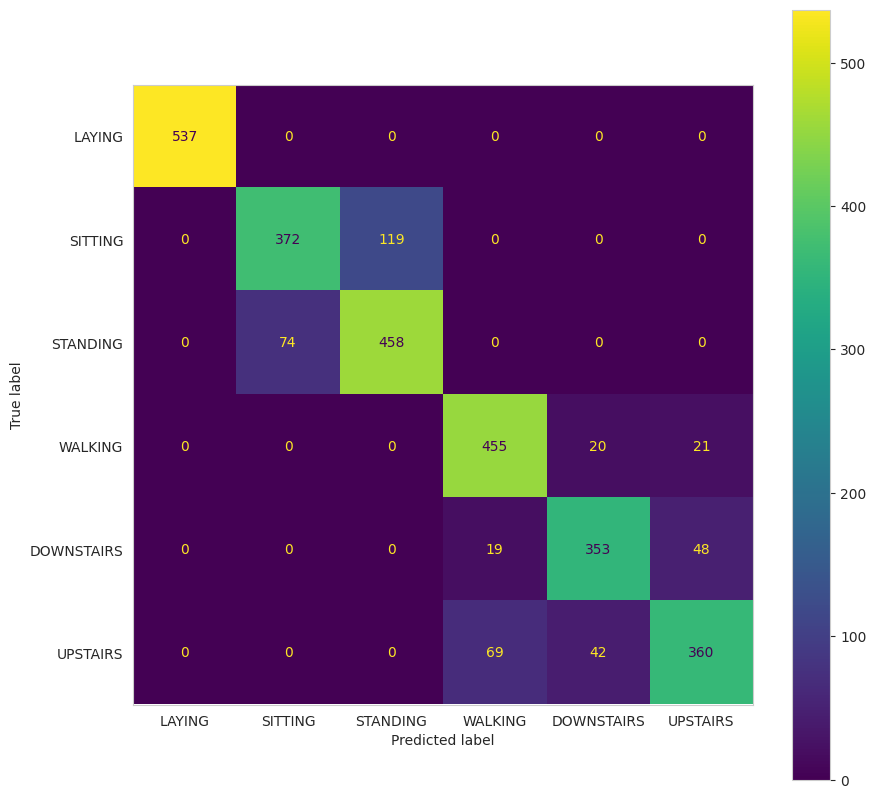

In [38]:
#Decision Tree
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

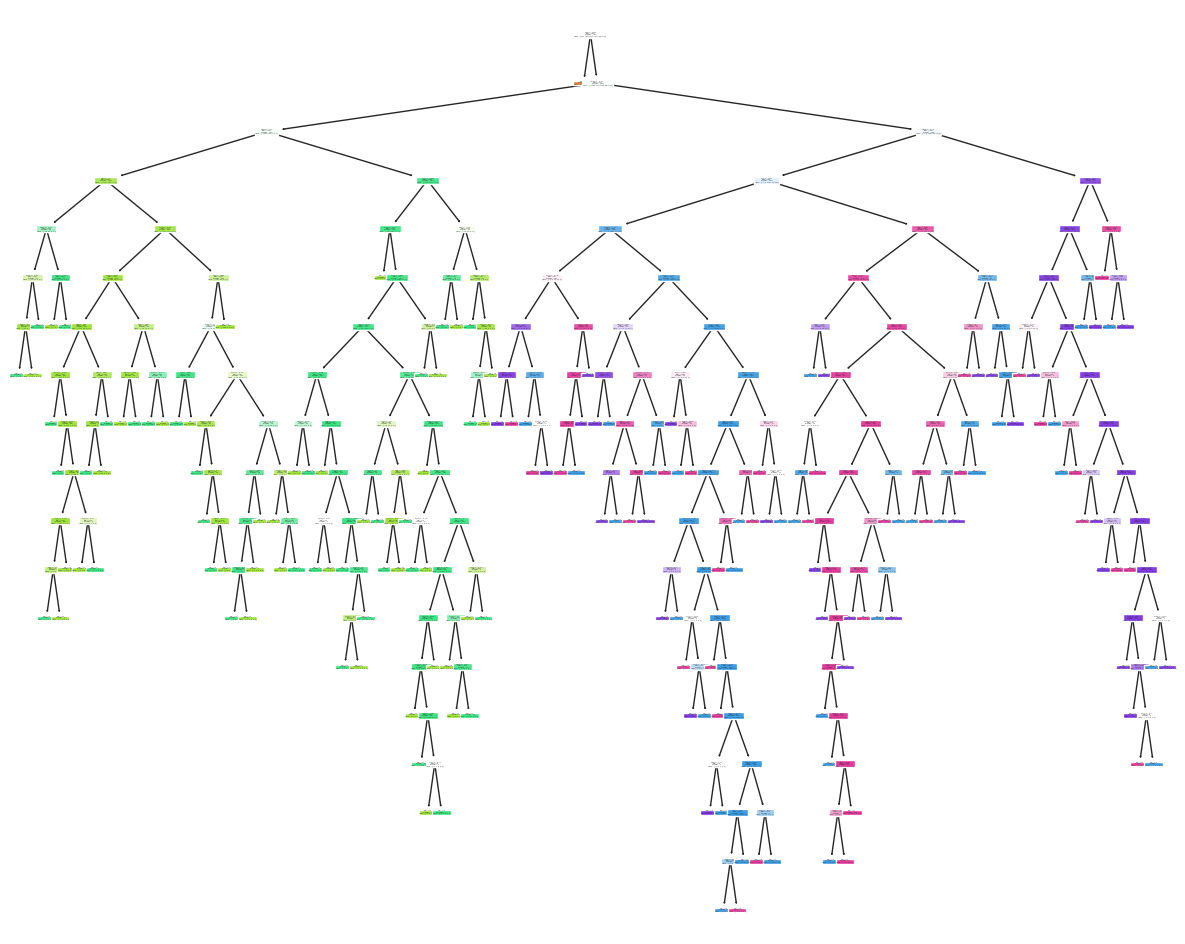

In [39]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(tdt , filled=True)
plt.show()


Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 92.67051238547675
Training Precesion RandomForestClassifier 100.0  Test Precesion RandomForestClassifier 92.67051238547675
Training Recall RandomForestClassifier 100.0  Test Recall RandomForestClassifier 92.67051238547675


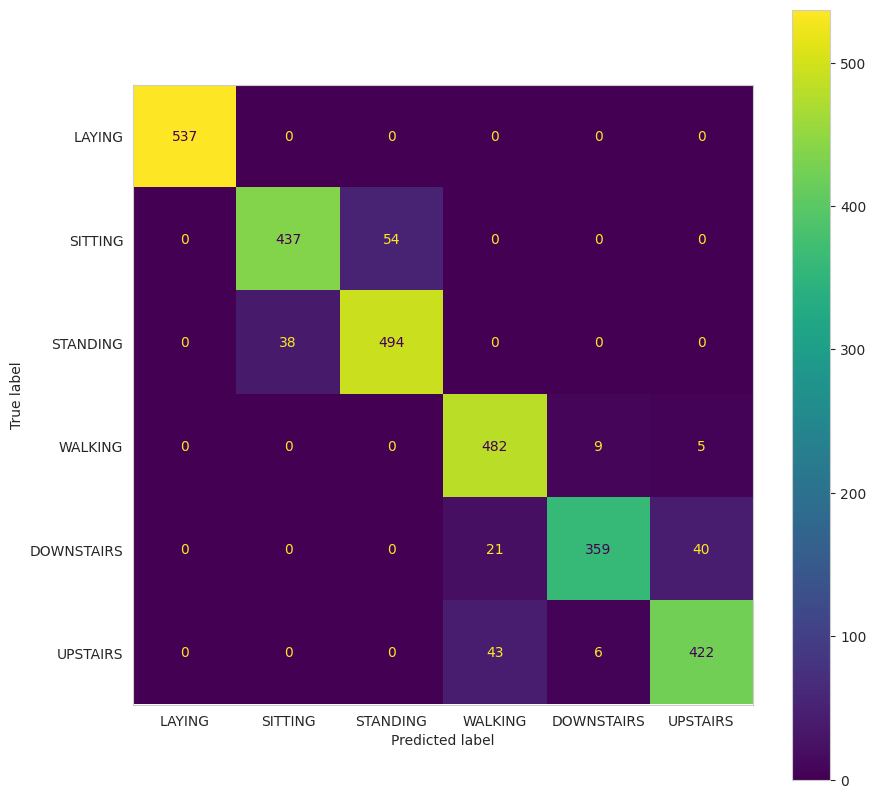

In [40]:
#Random Classifier
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

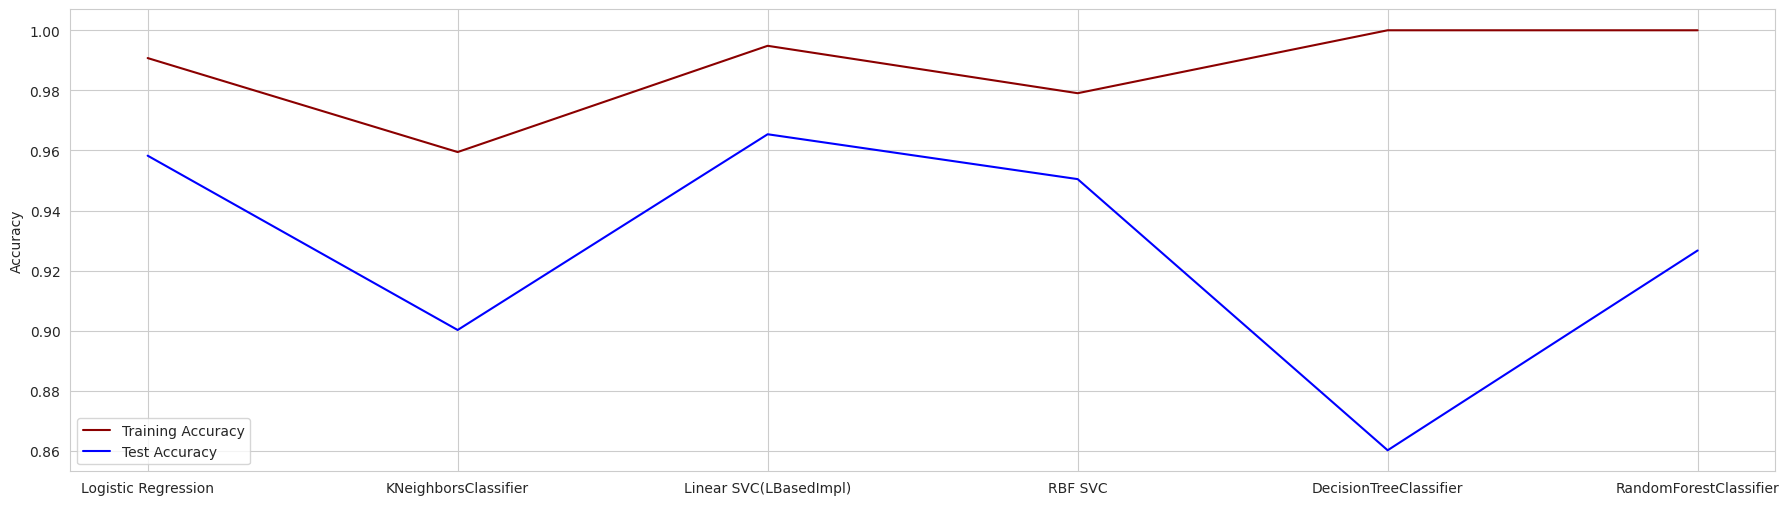

In [41]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)) , [value[0] for value in values], color='darkred')
ax.plot(np.arange(len(keys)) , [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

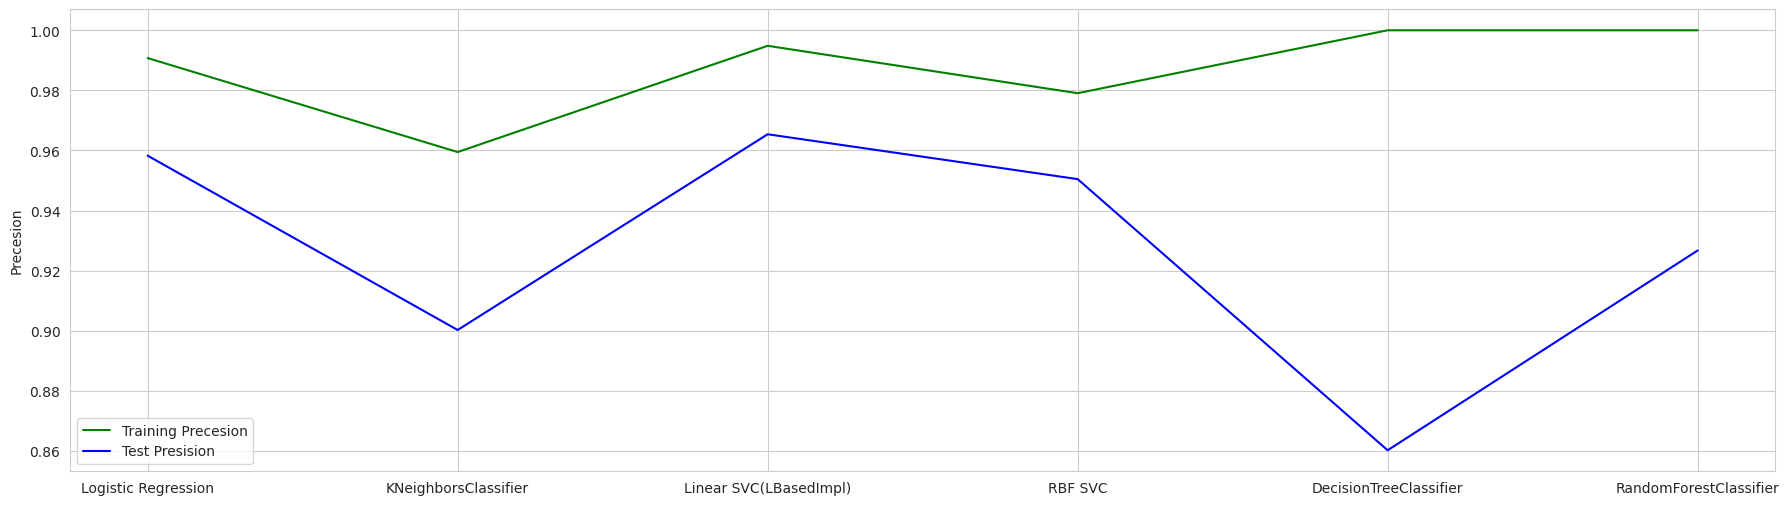

In [42]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[2] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[3] for value in values], color='b')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

Training Accuracy Linear SVC(PCA) 99.2348240095222  Test Accuracy Linear SVC(PCA) 98.57239972807615
Training Precesion Linear SVC(PCA) 99.2348240095222  Test Precesion Linear SVC(PCA) 98.57239972807615
Training Recall Linear SVC(PCA) 99.2348240095222  Test Recall Linear SVC(PCA) 98.57239972807615


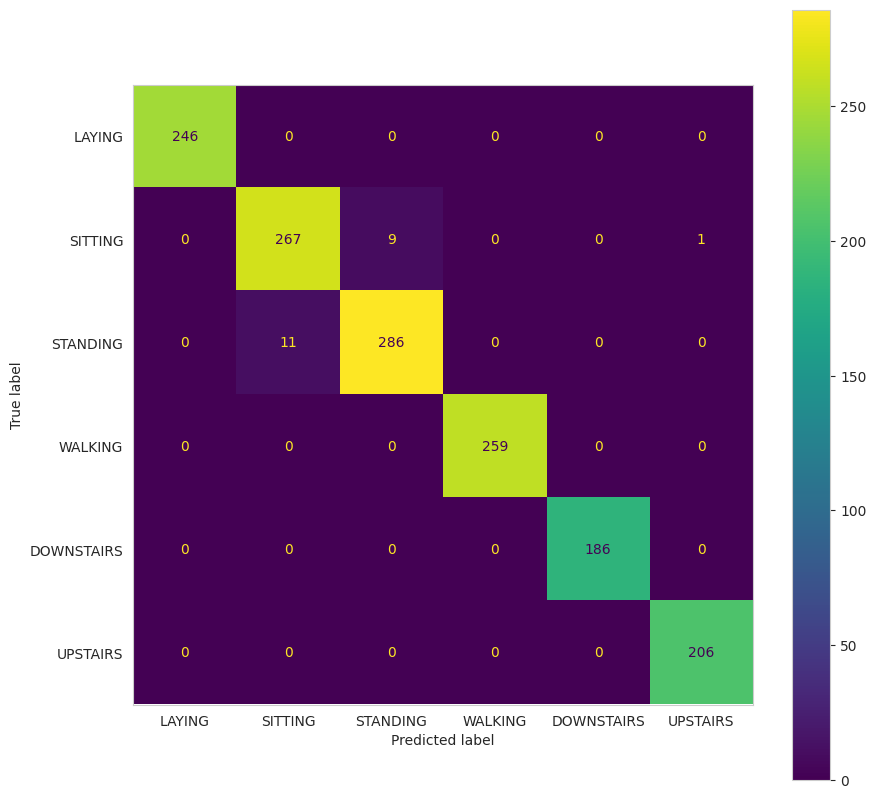

In [43]:
#Feature reduction with PCA
lin_svc_pca = svm.LinearSVC().fit(x_train_pca, y_train_pca)
evaluate_classification(lin_svc_pca, "Linear SVC(PCA)", x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Training Accuracy Linear SVC(Frequency) 98.16357762285325  Test Accuracy Linear SVC(Frequency) 96.4649898028552
Training Precesion Linear SVC(Frequency) 98.16357762285325  Test Precesion Linear SVC(Frequency) 96.4649898028552
Training Recall Linear SVC(Frequency) 98.16357762285325  Test Recall Linear SVC(Frequency) 96.4649898028552


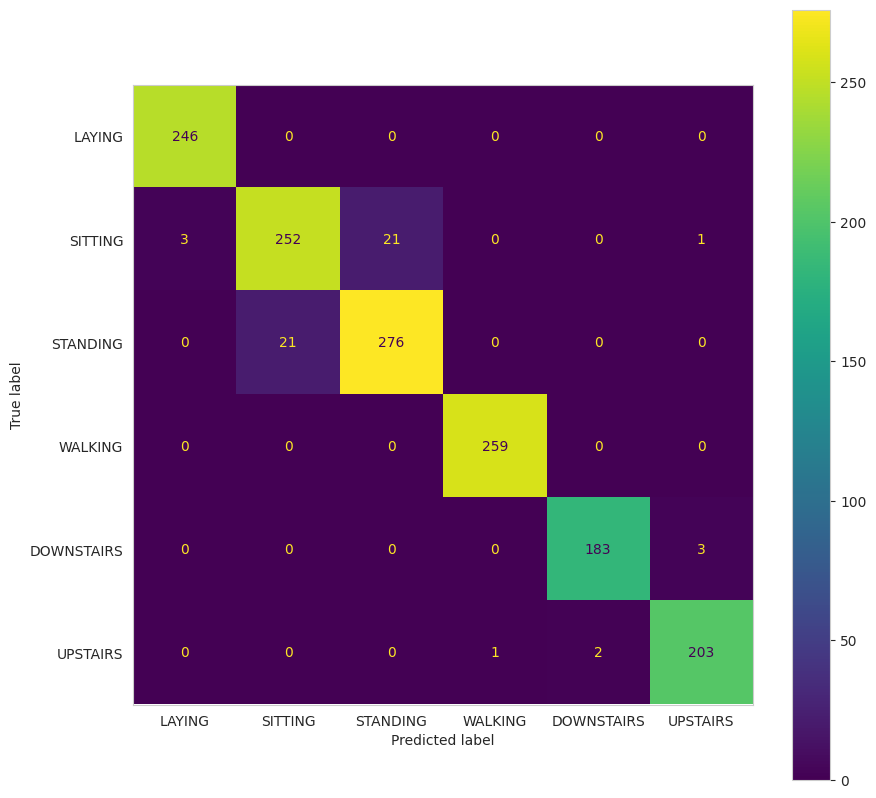

In [44]:
lin_svc_f = svm.LinearSVC().fit(x_train_f, y_train_f)
evaluate_classification(lin_svc_f, "Linear SVC(Frequency)", x_train_f, x_test_f, y_train_f, y_test_f)